# Section 3.1.1: GLRT asymptotics

This page contains simulations in Section 3.1.1

## Contents

    - Detection of the presence of statistical information from white noise
    - FUNCTION


## Detection of the presence of statistical information from white noise

In [27]:
import numpy as np
import scipy.linalg
import scipy.special
import matplotlib.pyplot as plt

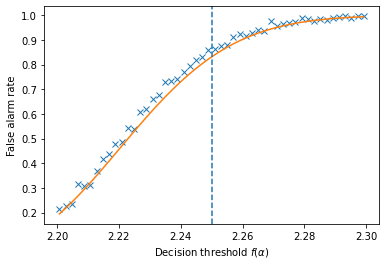

In [56]:
coeff = 2
p = 128*coeff
n = 512*coeff
c = p/n

a = np.concatenate([np.ones(p//2),-1*np.ones(p//2)]) # "determnistic" data structure
a = a/np.linalg.norm(a)
sigma2 = 1

nb_average_loop = 500
f_alpha_loop = (1+np.sqrt(c))**2+np.linspace(-5,5,50)*n**(-2/3)
emp_type_1_error = []
theo_type_1_error = []

np.random.seed(928)
T = lambda X : [ np.linalg.norm(Y,2)/np.trace(Y/p) for Y in [X@X.T/n] ][0]

for f_alpha in f_alpha_loop: # decision threshold
    emp_type_1_error.append(0)
    for average_loop in range(nb_average_loop):
        #s = np.random.randn(n) # random signal
        X = np.sqrt(sigma2)*np.random.randn(p,n)
        emp_type_1_error[-1] += (T(X)<f_alpha)/nb_average_loop

    theo_type_1_error.append(tracy_widom_appx((f_alpha - (1+np.sqrt(c))**2)*(1+np.sqrt(c))**(-4/3)*c**(1/6)*n**(2/3),1)[1])

plt.plot(f_alpha_loop,emp_type_1_error,'x')
plt.plot(f_alpha_loop,theo_type_1_error)
plt.axvline(x=(1+np.sqrt(c))**2,ls='--')
plt.xlabel(r'Decision threshold $f(\alpha)$')
plt.ylabel(r'False alarm rate')
_ = plt.show()

## FUNCTION

In [54]:
def tracy_widom_appx(x, i):
#
# [pdftwappx, cdftwappx]=tracywidom_appx(x, i)
#
# SHIFTED GAMMA APPROXIMATION FOR THE TRACY-WIDOM LAWS, by M. Chiani, 2014
# code publicly available https://www.mathworks.com/matlabcentral/fileexchange/44711-approximation-for-the-tracy-widom-laws
#
# TW ~ Gamma[k,theta]-alpha
#
# [pdf,cdf]=tracywidom_appx(x,i) for i=1,2,4 gives TW1, TW2, TW4
#
    kappx = [46.44604884387787, 79.6594870666346, 0, 146.0206131050228]   #  K, THETA, ALPHA
    thetaappx = [0.18605402228279347, 0.10103655775856243, 0, 0.05954454047933292]
    alphaappx = [9.848007781128567, 9.819607173436484, 0, 11.00161520109004]

    cdftwappx = cdfgamma(x+alphaappx[i-1], thetaappx[i-1], kappx[i-1])

    pdftwappx = pdfgamma(x+alphaappx[i-1], thetaappx[i-1], kappx[i-1])

    return pdftwappx, cdftwappx

def pdfgamma(x, ta, ka):
    if x > 0:
        return 1/(scipy.special.gamma(ka)*ta**ka) * x**(ka - 1) * np.exp(-x/ta)
    else:
        return 0

def cdfgamma(x, ta, ka):
    if x > 0:
        return scipy.special.gammainc(ka,x/ta)
    else:
        return 0
    